<h1><center>Project 2</center></h1>
<h2><center>CS675 – Introduction to Data Science </center></h2>
<h3><center>by</center></h3>
<h3><center>Member 1,Member 2,Member 3</center></h3>

**Task**: Implement a Time Series Forecasting model in Python, by using the TensorFlow/Keras modules

**Goal**: The forecasting model should be able to predict the [Sunspots](https://www.kaggle.com/robervalt/sunspots) by using Neural Networks (NNs), specifically Recurrent Neural Networks (RNNs) and/or Long Short Term Memory (LSTMs).

### Dataset description
The dataset contains Monthly Mean Total Sunspot Number – from January 1749 to July 2018.

Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.
Source: https://en.wikipedia.org/wiki/Sunspot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber,MeanAbsoluteError

#figure size for matplotlib plots
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)

## Pipeline for completing the forecasting task

1. Load the data
2. Preprocessing the data
3. Exploratory Analysis
4. Data preparation
5. Building the LSTM model
6. Testing the model
7. Evaluating the model

### 1. Load the data

#### 1.1. Read data using pandas

In [2]:
df = pd.read_csv('data.csv')[['Date','Monthly Mean Total Sunspot Number']]

### 2. Preprocessing the data

#### 2.1. Create new Columns for year and month 

In [3]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [4]:
df.tail()

,Date,Monthly Mean Total Sunspot Number,year,month
3247,2019-08-31,0.5,2019,8
3248,2019-09-30,1.1,2019,9
3249,2019-10-31,0.4,2019,10
3250,2019-11-30,0.5,2019,11
3251,2019-12-31,1.6,2019,12


#### 2.2. We now convert the dataframe to a [pivot table](https://searchsqlserver.techtarget.com/definition/pivot-table) in order to perform exploratory analysis

In [404]:
pv = pd.pivot_table(df, index=df.month, columns=df.year,
                    values='Monthly Mean Total Sunspot Number', aggfunc='sum')
pv

year,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,,,,,,,,,,,,
1,96.7,122.2,116.7,58.3,73.3,0.0,17.0,20.8,23.5,62.7,...,19.5,27.3,94.4,96.1,117.0,93.0,57.0,26.1,6.8,7.7
2,104.3,126.5,72.5,83.3,53.3,5.0,18.7,11.8,35.3,86.7,...,28.5,48.3,47.8,60.9,146.1,66.7,56.4,26.4,10.7,0.8
3,116.7,148.7,75.5,118.3,76.2,2.8,11.3,9.0,43.7,81.7,...,24.0,78.6,86.6,78.3,128.7,54.5,54.1,17.7,2.5,9.4
4,92.8,147.2,94.0,98.8,63.3,22.8,10.8,15.7,50.0,120.5,...,10.4,76.1,85.9,107.3,112.5,75.3,37.9,32.3,8.9,9.1
5,141.7,150.0,101.2,99.5,60.0,34.5,0.0,20.8,63.5,77.3,...,13.9,58.2,96.5,120.2,112.5,88.8,51.5,18.9,13.1,9.9
6,139.2,166.7,84.5,66.0,52.8,44.5,0.0,21.5,21.3,75.0,...,18.8,56.1,92.0,76.7,102.9,66.5,20.5,19.2,15.6,1.2
7,158.0,142.3,110.5,130.7,36.7,31.3,14.3,6.0,41.7,73.3,...,25.2,64.5,100.1,86.2,100.2,65.8,32.4,17.8,1.6,0.9
8,110.5,171.7,99.7,48.8,65.0,20.5,5.3,10.7,85.5,64.5,...,29.6,65.8,94.8,91.8,106.9,64.4,50.2,32.6,8.7,0.5
9,126.5,152.0,39.2,45.2,46.7,13.7,29.7,19.7,66.2,104.2,...,36.4,120.1,93.7,54.5,130.0,78.6,44.6,43.7,3.3,1.1


### 3. Exploratory Analysis

#### 3.1. Time series plot for the first 5 years

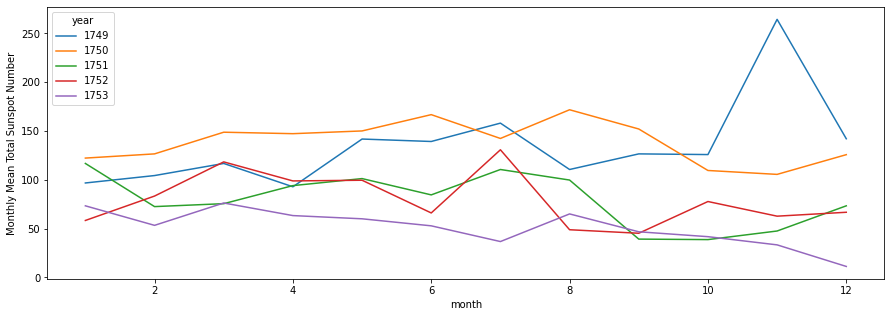

In [272]:
years = pv.columns[:5]
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.show()

#### 3.2. Now, lets see how the time series look from 1749 to july 2018

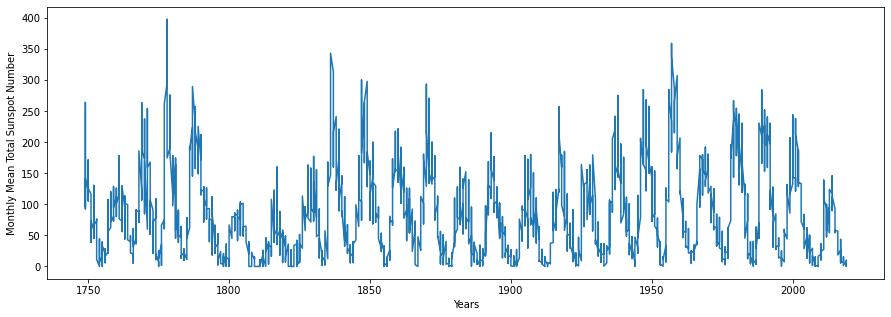

In [278]:
plt.plot(df['year'],df['Monthly Mean Total Sunspot Number'])
plt.xlabel('Years')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.show()

### 4. Data preparation 

#### 4.1. Now, we split the data into fix intervals with along with a prediction value.

In [61]:
years = 7 #hyperparameter
interval = 12*years 
X,y = [],[]
length = 3234
values = np.expand_dims(np.array(df['Monthly Mean Total Sunspot Number']),1)
for i in range (length):
    if i+interval < length:
        X.append(values[i:i+interval])
        y.append(values[i+interval])
X,y = np.array(X),np.array(y)

#### 4.2. we will now split our dataset into training and validation set.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### 5. Building the LSTM model

#### 5.1. Set the hyperparameters

In [66]:
#hyperparameters
units = 32
epochs = 50
batch_size = 32
learning_rate = 0.001

#activation function
activation = 'relu'

#optimizer
optimizer = Adam(learning_rate=learning_rate)

#loss function
loss = Huber()#'mse'

#### 5.2. Build the model using keras

In [67]:
model = Sequential(name = 'sunspot_model')
model.add(Input(shape = (interval,1)))
model.add(LSTM(units, return_sequences = True,activation = activation,name = 'LSTM_1'))
model.add(LSTM(units, return_sequences = False,activation = activation,name = 'LSTM_2'))
model.add(Dense(1,  activation = activation, name = 'Output'))
model.compile(loss = loss, optimizer=optimizer,metrics = ['mae'])
model.summary()

Model: "sunspot_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 84, 32)            4352      
_________________________________________________________________
LSTM_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


#### 5.3. Training the model

In [68]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2,validation_data=(X_val, y_val))

Epoch 1/50
66/66 - 7s - loss: 1062.8143 - mae: 1063.3055 - val_loss: 2639.4490 - val_mae: 2639.9387
Epoch 2/50
66/66 - 7s - loss: 1395.2719 - mae: 1395.7620 - val_loss: 1518.4547 - val_mae: 1518.9463
Epoch 3/50
66/66 - 7s - loss: 1626.6134 - mae: 1627.1030 - val_loss: 858.7679 - val_mae: 859.2577
Epoch 4/50
66/66 - 8s - loss: 405.2835 - mae: 405.7728 - val_loss: 183.0763 - val_mae: 183.5648
Epoch 5/50
66/66 - 7s - loss: 126.4954 - mae: 126.9846 - val_loss: 111.5994 - val_mae: 112.0875
Epoch 6/50
66/66 - 7s - loss: 94.0056 - mae: 94.4951 - val_loss: 93.3513 - val_mae: 93.8394
Epoch 7/50
66/66 - 7s - loss: 93.0785 - mae: 93.5673 - val_loss: 83.4671 - val_mae: 83.9552
Epoch 8/50
66/66 - 6s - loss: 86.1849 - mae: 86.6736 - val_loss: 84.9750 - val_mae: 85.4631
Epoch 9/50
66/66 - 7s - loss: 86.3010 - mae: 86.7898 - val_loss: 99.8847 - val_mae: 100.3728
Epoch 10/50
66/66 - 7s - loss: 85.0031 - mae: 85.4918 - val_loss: 84.4904 - val_mae: 84.9785
Epoch 11/50
66/66 - 15s - loss: 89.5587 - mae: 9

#### 5.4. Plot training and validation loss 

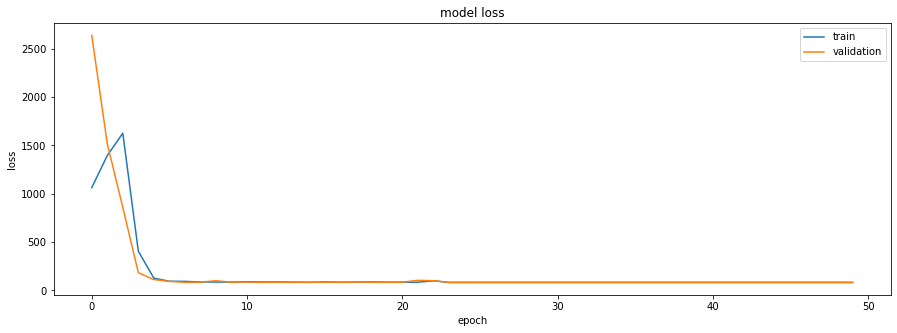

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### 6. Testing the model

#### 6.1. Prediction from Aug 2018 to Dec 2019

In [20]:
test = np.array(df['Monthly Mean Total Sunspot Number'][-19:])
test_years = np.array(df['year'][-19:])
test = values[-19:,:]

In [70]:
history = tf.convert_to_tensor(np.expand_dims(X[-1],0))
prediction_list = []
for i in range(len(test)):
    prediction = model.predict(history)
    prediction_list.append(prediction.ravel())
    prediction = np.expand_dims(prediction,0)
    history = np.delete(history, (0), axis=1)
    history = np.append(history, prediction,axis= 1)

#### 6.2. Plot the results against the real forecasts

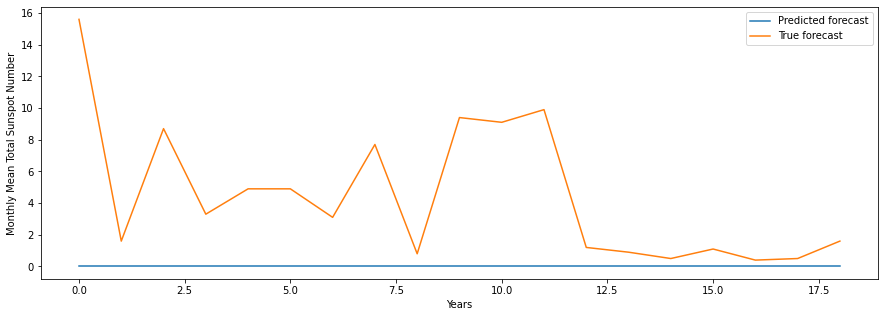

In [71]:
plt.plot(prediction_list, label='Predicted forecast')
plt.plot(test, label = 'True forecast')
plt.xlabel('Years')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.legend()
plt.show()